In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\reidw\Documents\Personal Files (Synced)\2024 Classes\Semester 1\DATA3888\Brain_1\final_report':
  os.chdir(r'C:\Users\reidw\Documents\Personal Files (Synced)\2024 Classes\Semester 1\DATA3888\Brain_1\final_report')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\reidw\AppData\Local\Temp\ipykernel_10456\3016944475.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\importlib\\_bootstrap.py": 1659316980.4578094, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\importlib\\_bootstrap_external.py": 1659316980.4588099, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\codecs.py": 1670880235.443118, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\encodings\\aliases.py": 1659316979.9510162, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\encodings\\__init__.py": 1659316979.989015, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\encodings\\utf_8.py": 1659316979.9880154, "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2

In [2]:
try:
  import pandas as pd
except:
  !pip install pandas
  import pandas as pd

try:
  import numpy as np
except:
  !pip install numpy
  import numpy as np

try:
  import glob
except:
  !pip install glob
  import glob

try:
  import sklearn
except:
  !pip install scikit-learn
  import sklearn

try:
  import joblib
except:
  !pip install joblib
  import joblib

try:
  import scipy
except:
  !pip install scipy
  import scipy

import warnings #preinstalled I think
warnings.simplefilter(action='ignore', category=FutureWarning)

# import pandas as pd
# import numpy as np
# import glob
import os #preinstalled I think
import statistics #preinstalled I think

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from joblib import load

In [3]:
def read_all_csvs_to_df(directory_path):
    pattern = f"{directory_path}/*.csv"
    csv_files = glob.glob(pattern)
    data_rows = []
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        df_complex = df.map(complex)
        df_real = df_complex.map(np.real) # discarding the complex part of the number
        flattened_data = df_real.values.flatten()
        data_rows.append(flattened_data)
    final_df = pd.DataFrame(data_rows)
    final_df.columns = [f'col_{i}' for i in range(final_df.shape[1])]
    return final_df

def read_live_csvs_to_df(directory_path):
    pattern = f"{directory_path}/*.csv"
    csv_files = glob.glob(pattern)
    exists = False
    for csv_file in csv_files:
        if exists == False:
            final_df = pd.read_csv(csv_file)
            exists = True
        else:
            new_df = pd.read_csv(csv_file)
            final_df = pd.concat([final_df.copy(), new_df], ignore_index=True)
    return final_df

def stdev(scaled_list):
    return statistics.stdev(scaled_list[:4800])

def predict_sd(scaled_list):
    if scaled_list[-2] >= threshold:
        prediction = 1
    else:
        prediction = 0
    return prediction

def evaluate_cm(cm, labels):
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    results_breakdown = pd.DataFrame(columns=labels)
    results_breakdown.loc["False Positive Rate"] = np.around(FP/(FP+TN),decimals=3)
    results_breakdown.loc["False Negative Rate"] = np.around(FN/(TP+FN),decimals=3)
    results_breakdown.loc["Sensitivity"] = np.around(TP/(TP+FN),decimals=3)
    results_breakdown.loc["Specificity"] = np.around(TN/(TN+FP) ,decimals=3)
    results_breakdown.loc["Precision"] = np.around(TP/(TP+FP),decimals=3)
    results_breakdown.loc["Negative Predictive Value"] = np.around(TN/(TN+FN),decimals=3)
    results_breakdown.loc["Accuracy"] = np.around((TP+TN)/(TP+FP+FN+TN),decimals=3)

    return results_breakdown

current_directory = os.getcwd()

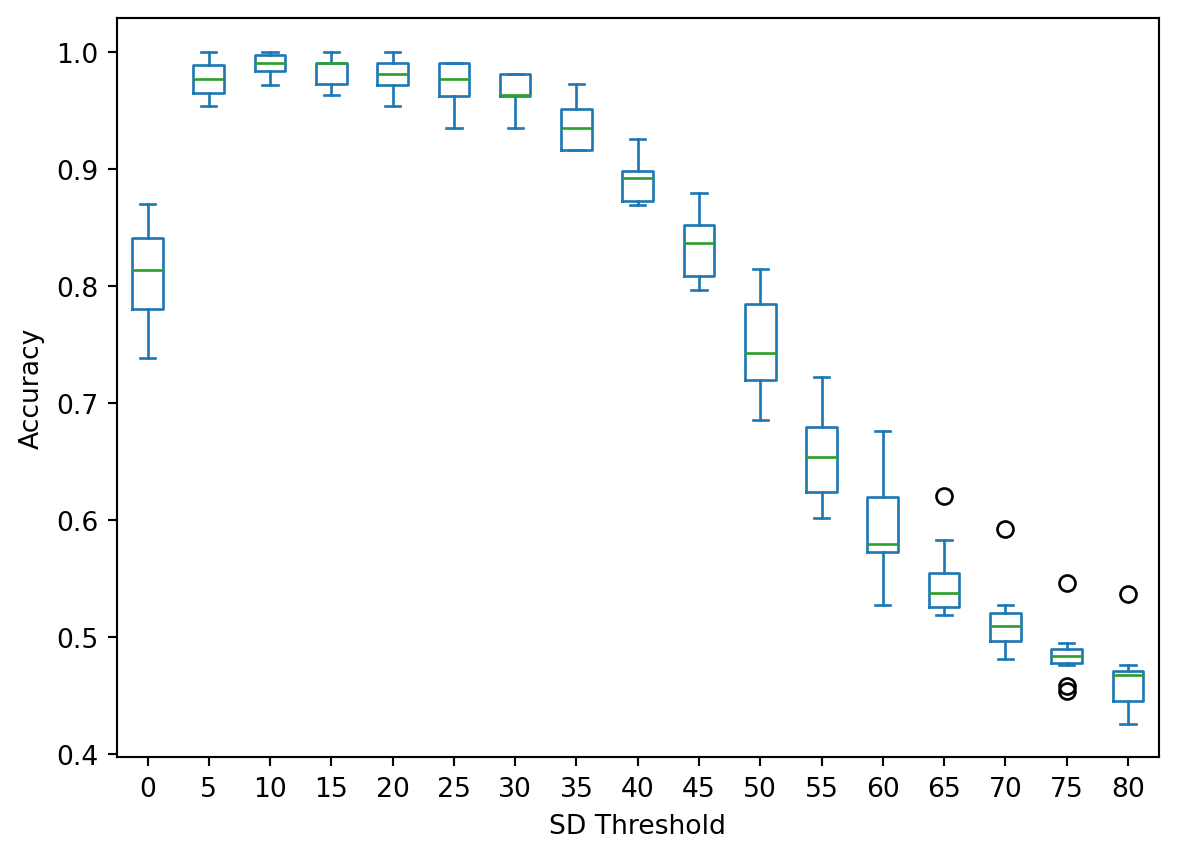

In [4]:
#| label: fig2
#| fig-cap: "Figure 2: Box plot illustrating the distribution of accuracy, when applying the standard-deviation based general event classifier to 10 folds of randomly-divided training data at varying thresholds."

blinks = read_all_csvs_to_df(current_directory + "\\train_data\\blinks")
left = read_all_csvs_to_df(current_directory + "\\train_data\\left")
right = read_all_csvs_to_df(current_directory + "\\train_data\\right")
nonevents = read_all_csvs_to_df(current_directory + "\\train_data\\non_events")

blinks_live = read_live_csvs_to_df(current_directory + "\\train_data\\blinks_live")
left_live = read_live_csvs_to_df(current_directory + "\\train_data\\left_live")
right_live = read_live_csvs_to_df(current_directory + "\\train_data\\right_live")

blinks = pd.concat([blinks, blinks_live], ignore_index=True)
left = pd.concat([left, left_live], ignore_index=True)
right = pd.concat([right, right_live], ignore_index=True)

fig2_events = pd.concat([blinks, left, right], ignore_index=True)
fig2_events = fig2_events.dropna(axis='columns')
fig2_events['sd'] = fig2_events.apply(stdev, axis = 1)
fig2_events['label'] = 1
fig2_nonevents = nonevents.copy()
fig2_nonevents = fig2_nonevents.dropna(axis='columns')
fig2_nonevents['sd'] = fig2_nonevents.apply(stdev, axis = 1)
fig2_nonevents['label'] = 0

fig2_combined = pd.concat([fig2_events, fig2_nonevents], axis = 0)

fig2_split = np.array_split(shuffle(fig2_combined, random_state = 3888), 10) # Shuffle with random state set for reproducibility, and split into 10 folds

results = list()
for i in range(len(fig2_split)):
    threshold = 0

    results.append(pd.DataFrame({'threshold': [], 'acc_' + str(i): []}))

    while threshold <= 80:
        predicted = fig2_split[i].copy()
        #predicted['prediction'] = predicted.apply(predict_zc, axis = 1)
        predicted['prediction'] = predicted.apply(predict_sd, axis = 1)

        confusion = predicted.groupby(['label','prediction']).size().reset_index()
        #print(confusion)

        correct = 0
        j = 0
        while j < len(confusion[0]):
            if confusion['label'][j] == confusion['prediction'][j]:
                correct = correct + confusion[0][j]
            j += 1

        accuracy = correct/sum(confusion[0])
        results[i].loc[len(results[i])] = [str(int(threshold)), accuracy] 
        threshold += 5

results_plot = results[0].set_index("threshold")

for i in range(1, len(results)):
    results_plot = results_plot.join(results[i].set_index("threshold"))

gen_error = str(round(statistics.mean(results_plot.iloc[7])*100, 2)) + "% ± " + str(round(scipy.stats.sem(results_plot.iloc[7])*100, 2))

fig_2 = results_plot.transpose().plot(kind = 'box', xlabel = "SD Threshold", ylabel = "Accuracy")
fig_2.figure.savefig("figures\\fig_2.png")

Accuracy: 0.4672897196261682


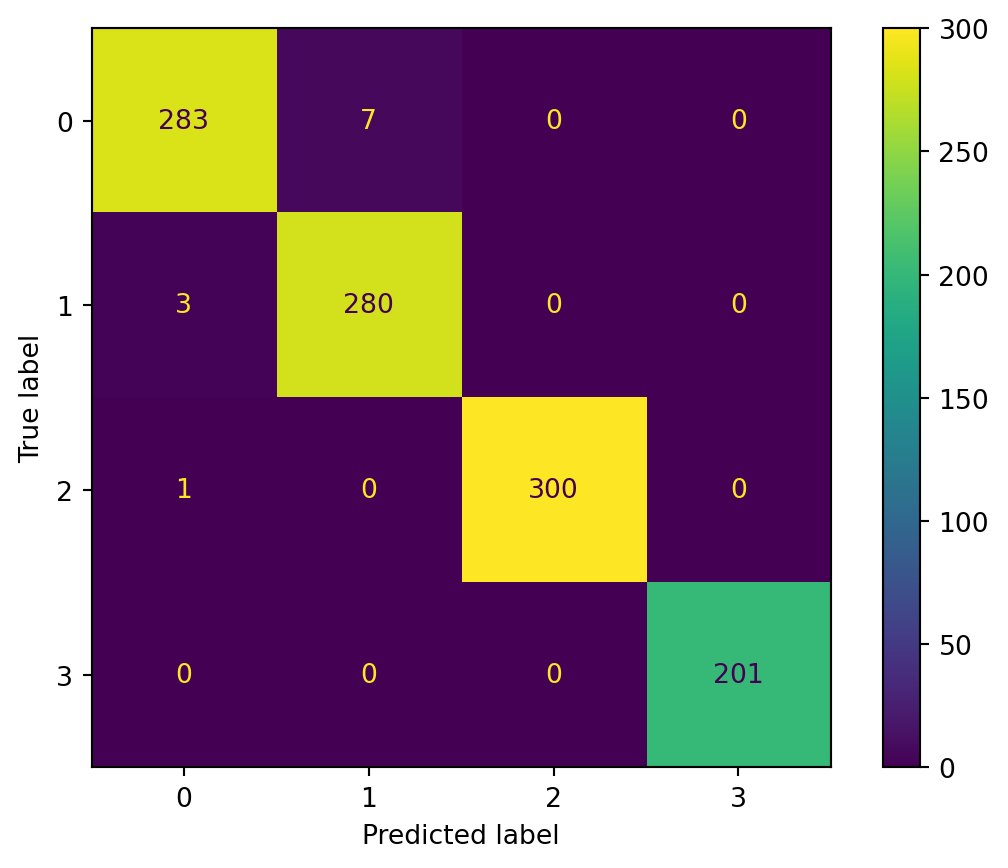

In [5]:
#| label: fig3
#| fig-cap: "Figure 3: Confusion matrix describing the training performance of the final random forest model, after hyperparameter optimisation. 0 represents blink (n = 290), 1 represents left (n = 283), 2 represents right (n = 301), and 3 represents a non-event (n = 201)."

# same data imported for Figure 2 is used here
blinks['label'] = 0
left['label'] = 1
right['label'] = 2
nonevents['label'] = 4 #because 3 was reserved for doubleblinks, which were later implemented using a different method

traintest_combined = pd.concat([blinks, left, right, nonevents], axis = 0)

model = load('models\\live_rf_b_l_r_ne_combined.joblib')
X = traintest_combined.drop('label', axis=1)
y = traintest_combined['label']

y_pred = model.predict(X)
train_accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot().figure_.savefig('figures\\fig_3.png')

In [6]:
display(evaluate_cm(cm, ('Blink', 'Left', 'Right', 'Non-event')))

,Blink,Left,Right,Non-event
False Positive Rate,0.005,0.009,0.000,0.0
False Negative Rate,0.024,0.011,0.003,0.0
Sensitivity,0.976,0.989,0.997,1.0
Specificity,0.995,0.991,1.000,1.0
Precision,0.986,0.976,1.000,1.0
Negative Predictive Value,0.991,0.996,0.999,1.0
Accuracy,0.990,0.991,0.999,1.0


Accuracy: 0.9666666666666667


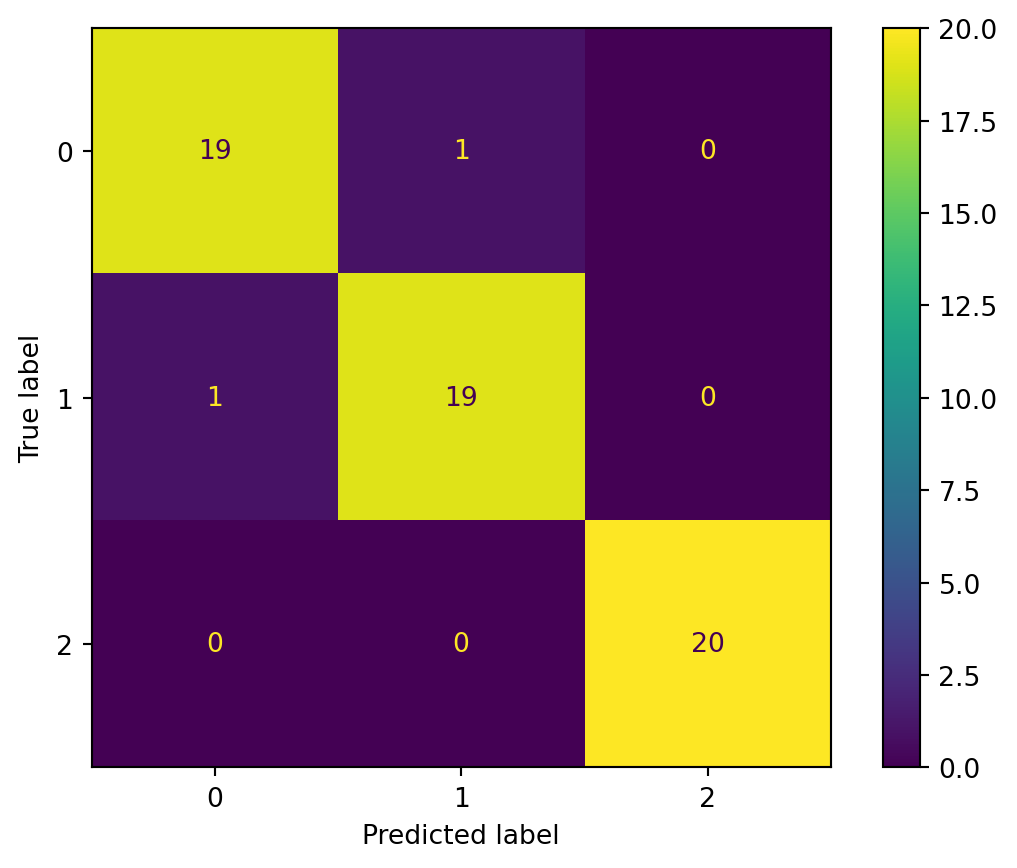

In [7]:
#| label: fig4
#| fig-cap: "Figure 4: Confusion matrix describing the live streamed performance of the final random forest model. 0 represents blink, 1 represents left, and 2 represents right (n = 20)."

livetest_blinks = read_live_csvs_to_df(current_directory + "\\live_data\\blinks")
livetest_left = read_live_csvs_to_df(current_directory + "\\live_data\\left")
livetest_right = read_live_csvs_to_df(current_directory + "\\live_data\\right")

livetest_blinks['label'] = 0
livetest_left['label'] = 1
livetest_right['label'] = 2

livetest_combined = pd.concat([livetest_blinks, livetest_left, livetest_right], axis = 0)

model = load('models\\live_rf_b_l_r_ne_combined.joblib')
X = livetest_combined.drop('label', axis=1)
y = livetest_combined['label']

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot().figure_.savefig('figures\\fig_4.png')

In [8]:
display(evaluate_cm(cm, ('Blink', 'Left', 'Right')))

,Blink,Left,Right
False Positive Rate,0.025,0.025,0.0
False Negative Rate,0.050,0.050,0.0
Sensitivity,0.950,0.950,1.0
Specificity,0.975,0.975,1.0
Precision,0.950,0.950,1.0
Negative Predictive Value,0.975,0.975,1.0
Accuracy,0.967,0.967,1.0


In [9]:
# from tsfresh import extract_features

# def prepare_for_tsfresh(df):
#     final_df = df.transpose()
#     final_df = final_df.groupby(np.arange(len(final_df))//25).mean()
#     final_df = final_df.transpose()
#     final_df = final_df.melt(ignore_index=False).reset_index()
#     final_df.columns = ['unique_id', 'ds', 'y']
#     final_df["ds"] = final_df["ds"].astype(int)
#     final_df = final_df.set_index('ds')
#     return final_df

# livetest_blinks = read_live_csvs_to_df(current_directory + "\\live_data\\blinks")
# livetest_left = read_live_csvs_to_df(current_directory + "\\live_data\\left")
# livetest_right = read_live_csvs_to_df(current_directory + "\\live_data\\right")

# livetest_blinks = prepare_for_tsfresh(livetest_blinks)
# livetest_left = prepare_for_tsfresh(livetest_left)
# livetest_right = prepare_for_tsfresh(livetest_right)

# livetest_blinks['label'] = 0
# livetest_left['label'] = 1
# livetest_right['label'] = 2

# livetest_combined = pd.concat([livetest_blinks, livetest_left, livetest_right], axis = 0)

# livetest_combined['unique_id'] = livetest_combined.pop('label').astype(str) + "_" + livetest_combined.pop('unique_id').astype(str)
# labels = livetest_combined['unique_id'].drop_duplicates().str[0].reset_index(drop=True)
# labels.index = livetest_combined['unique_id'].drop_duplicates()

# ten_features = {
#     'agg_linear_trend': [
#         {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'mean'},
#         {'attr': 'slope', 'chunk_len': 50, 'f_agg': 'max'},
#         {'attr': 'intercept', 'chunk_len': 10, 'f_agg': 'min'},
#         {'attr': 'intercept', 'chunk_len': 5, 'f_agg': 'min'},
#         {'attr': 'slope', 'chunk_len': 10, 'f_agg': 'mean'}
#     ],
#     'mean_n_absolute_max': [{'number_of_maxima': 7}],
#     'spkt_welch_density': [{'coeff': 2}],
#     'index_mass_quantile': [{'q': 0.7}],
#     'linear_trend': [{'attr': 'slope'}],
#     'change_quantiles': [{'f_agg': 'var', 'isabs': True, 'qh': 1.0, 'ql': 0.4}]
# }

# # all_features=extract_features(livetest_combined, column_id='unique_id')
# all_features = extract_features(livetest_combined, column_id='unique_id', default_fc_parameters=ten_features)

# model = load('models\\ts_10_rf_b_l_r_ne_combined.joblib')
# X = all_features
# y = labels

# y_pred = model.predict(X)
# accuracy = accuracy_score(y, y_pred)
# print("Accuracy:", accuracy)
# cm = confusion_matrix(y, y_pred)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot()